Kelompok 03 (22IF02) : <br>
Rachmasari Annisa Rida (22.11.4624) <br>
Rahmat Wahyuma Akbar (22.11.4631) <br>
Dennita Noor Febianty (22.11.4640) <br>
Hidayah Renaz Rachmawan (22.11.4642)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Load Dataset

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/RachmasariAR/FP_BigData03/main/Data_Tanaman_Padi_Sumatera.csv")
df

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.00,323589.00,1627.0,82.00,26.06
1,Aceh,1994,1299699.00,329041.00,1521.0,82.12,26.92
2,Aceh,1995,1382905.00,339253.00,1476.0,82.72,26.27
3,Aceh,1996,1419128.00,348223.00,1557.0,83.00,26.08
4,Aceh,1997,1368074.00,337561.00,1339.0,82.46,26.31
...,...,...,...,...,...,...,...
240,Lampung,2019,2164089.33,464103.42,1706.4,78.03,27.23
241,Lampung,2020,2604913.29,545149.05,2211.3,75.80,24.58
242,Lampung,2021,2453827.00,501726.00,1829.0,78.00,25.00
243,Lampung,2022,3572882.30,552718.00,1999.0,78.20,26.20


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        245 non-null    object 
 1   Tahun           245 non-null    int64  
 2   Produksi        245 non-null    float64
 3   Luas Panen      245 non-null    float64
 4   Curah hujan     236 non-null    float64
 5   Kelembapan      234 non-null    float64
 6   Suhu rata-rata  236 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.5+ KB


#EDA Cleaning

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Provinsi           0
Tahun              0
Produksi           0
Luas Panen         0
Curah hujan        9
Kelembapan        11
Suhu rata-rata     9
dtype: int64

In [ ]:
null_columns = ['Curah hujan', 'Kelembapan', 'Suhu rata-rata']
df[null_columns]

,Curah hujan,Kelembapan,Suhu rata-rata
0,1627.0,82.00,26.06
1,1521.0,82.12,26.92
2,1476.0,82.72,26.27
3,1557.0,83.00,26.08
4,1339.0,82.46,26.31
...,...,...,...
240,1706.4,78.03,27.23
241,2211.3,75.80,24.58
242,1829.0,78.00,25.00
243,1999.0,78.20,26.20


In [ ]:
CH_median = df['Curah hujan'].median()
CH_null_index = df['Curah hujan'].isna()
df.loc[CH_null_index, 'Curah hujan'] = CH_median
df[null_columns].isna().sum()

Curah hujan        0
Kelembapan        11
Suhu rata-rata     9
dtype: int64

In [ ]:
kelembapan_mean = df['Kelembapan'].mean()
kelembapan_null_index = df['Kelembapan'].isna()
df.loc[kelembapan_null_index, 'Kelembapan'] = kelembapan_mean
df[null_columns].isna().sum()

Curah hujan       0
Kelembapan        0
Suhu rata-rata    9
dtype: int64

In [ ]:
suhu_mean = df['Suhu rata-rata'].mean()
suhu_null_index = df['Suhu rata-rata'].isna()
df.loc[suhu_null_index, 'Suhu rata-rata'] = suhu_mean
df[null_columns].isna().sum()

Curah hujan       0
Kelembapan        0
Suhu rata-rata    0
dtype: int64

In [ ]:
df.isnull().sum()

Provinsi          0
Tahun             0
Produksi          0
Luas Panen        0
Curah hujan       0
Kelembapan        0
Suhu rata-rata    0
dtype: int64

#Outlier

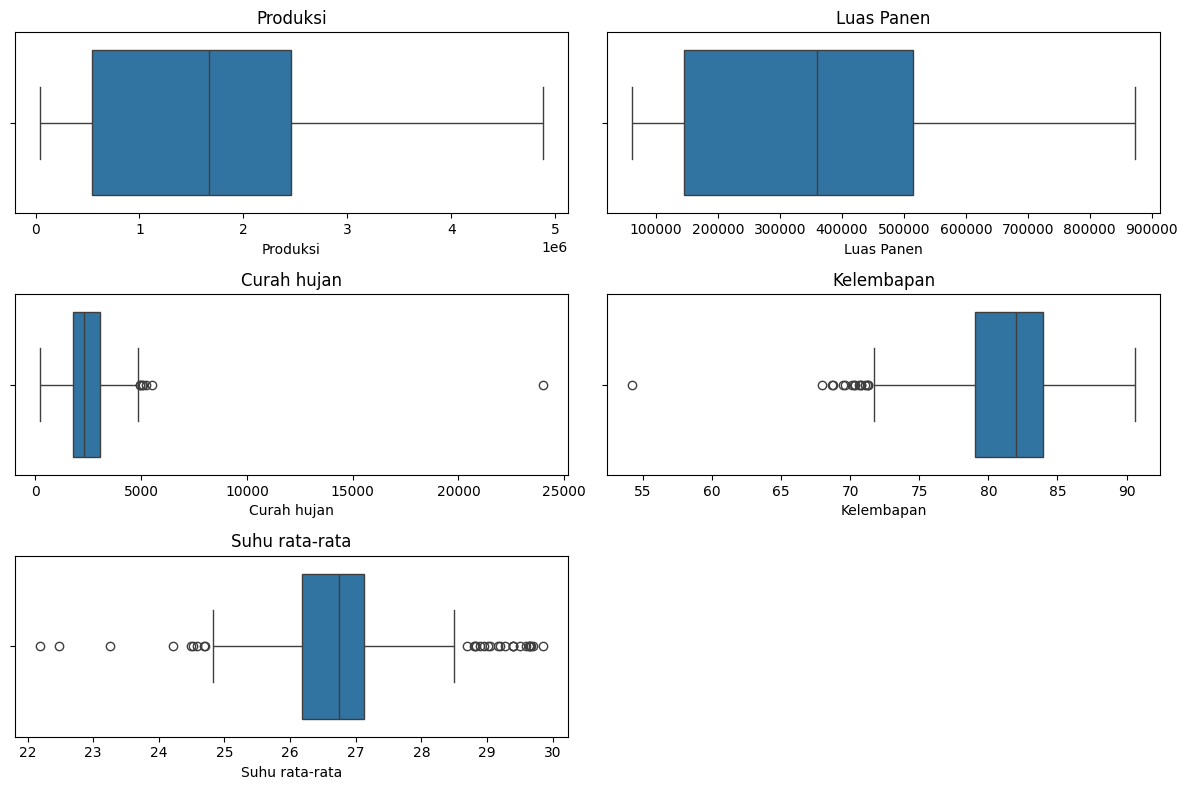

In [ ]:
#ukuran figure
plt.figure(figsize=(12,8))

#membuat subplot untuk setiap boxplot
plt.subplot(3,2,1)
sns.boxplot(x=df['Produksi'])
plt.title("Produksi")

plt.subplot(3,2,2)
sns.boxplot(x=df['Luas Panen'])
plt.title("Luas Panen")

plt.subplot(3,2,3)
sns.boxplot(x=df['Curah hujan'])
plt.title("Curah hujan")

plt.subplot(3,2,4)
sns.boxplot(x=df['Kelembapan'])
plt.title("Kelembapan")

plt.subplot(3,2,5)
sns.boxplot(x=df['Suhu rata-rata'])
plt.title("Suhu rata-rata")


#Untuk layouting tampilan boxplot
plt.tight_layout()

plt.show()

In [ ]:
df.shape

(245, 7)

In [ ]:
Q1 = df['Curah hujan'].quantile(0.25)
Q3 = df['Curah hujan'].quantile(0.75)
IQR = Q3-Q1 #Interquartile Range

df = df[~((df['Curah hujan']<(Q1-1.5*IQR)) | (df['Curah hujan']>(Q3+1.5*IQR)))]

df.shape

(238, 7)

In [ ]:
Q1 = df['Kelembapan'].quantile(0.25)
Q3 = df['Kelembapan'].quantile(0.75)
IQR = Q3-Q1 #Interquartile Range

df = df[~((df['Kelembapan']<(Q1-1.5*IQR)) | (df['Kelembapan']>(Q3+1.5*IQR)))]

df.shape

(223, 7)

In [ ]:
Q1 = df['Suhu rata-rata'].quantile(0.25)
Q3 = df['Suhu rata-rata'].quantile(0.75)
IQR = Q3-Q1 #Interquartile Range

df = df[~((df['Suhu rata-rata']<(Q1-1.5*IQR)) | (df['Suhu rata-rata']>(Q3+1.5*IQR)))]

df.shape

(203, 7)

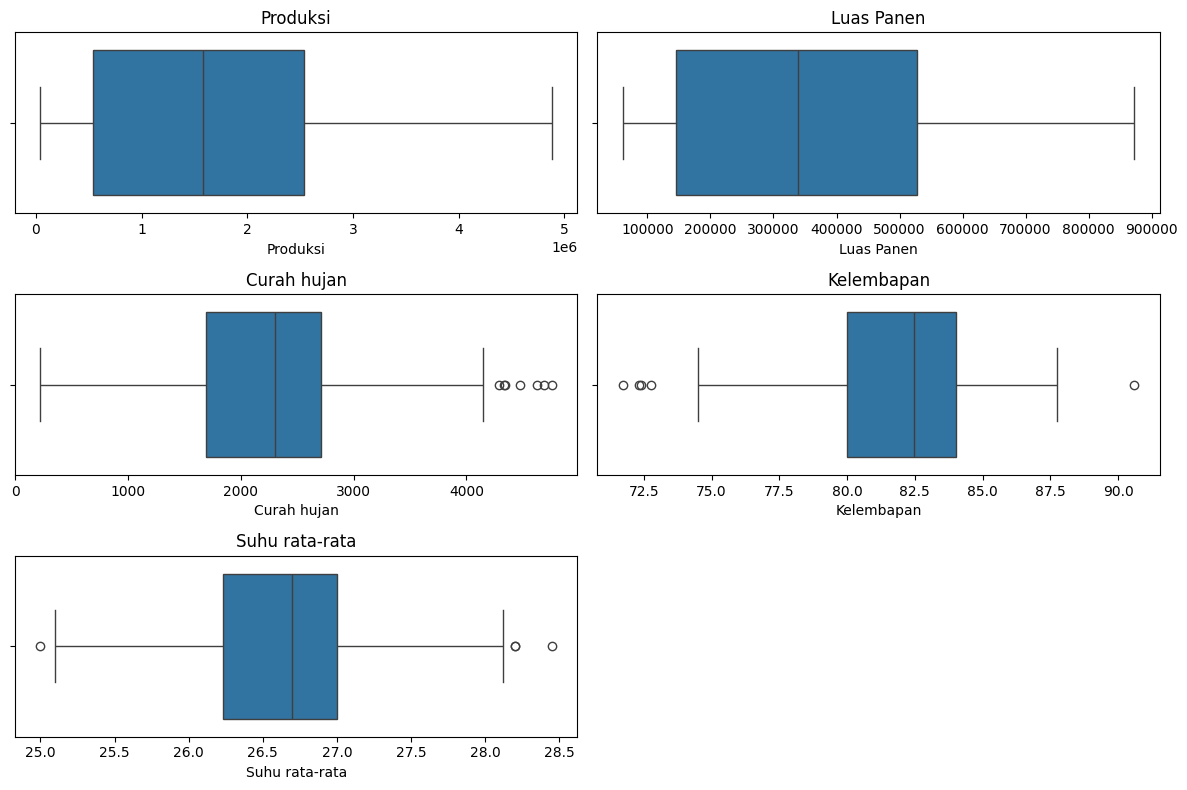

In [ ]:
#ukuran figure
plt.figure(figsize=(12,8))

#membuat subplot untuk setiap boxplot
plt.subplot(3,2,1)
sns.boxplot(x=df['Produksi'])
plt.title("Produksi")

plt.subplot(3,2,2)
sns.boxplot(x=df['Luas Panen'])
plt.title("Luas Panen")

plt.subplot(3,2,3)
sns.boxplot(x=df['Curah hujan'])
plt.title("Curah hujan")

plt.subplot(3,2,4)
sns.boxplot(x=df['Kelembapan'])
plt.title("Kelembapan")

plt.subplot(3,2,5)
sns.boxplot(x=df['Suhu rata-rata'])
plt.title("Suhu rata-rata")


#Untuk layouting tampilan boxplot
plt.tight_layout()

plt.show()

#Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df['Provinsi'] = enc.fit_transform(df['Provinsi'])
df.tail(30)

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
212,1,2022,316527.00,78253.00,3475.0,80.93594,25.70
213,1,2023,572396.00,80192.30,3628.0,82.00000,26.00
214,3,1993,1646900.00,433078.00,2306.7,84.82000,26.41
215,3,1994,1615751.00,425940.00,2034.2,77.51000,25.73
216,3,1995,1943709.00,514363.00,3039.4,82.81000,26.43
217,3,1996,1971740.00,515192.00,1934.9,82.61000,26.27
218,3,1997,1753656.00,454087.00,1253.3,78.46000,26.68
219,3,1998,1975700.00,521575.00,2584.9,84.07000,26.95
220,3,1999,1801422.00,476899.00,2364.7,83.46000,26.24
221,3,2000,1946406.00,496879.00,1488.5,82.86000,28.20


#Korelasi dan Visualisasi

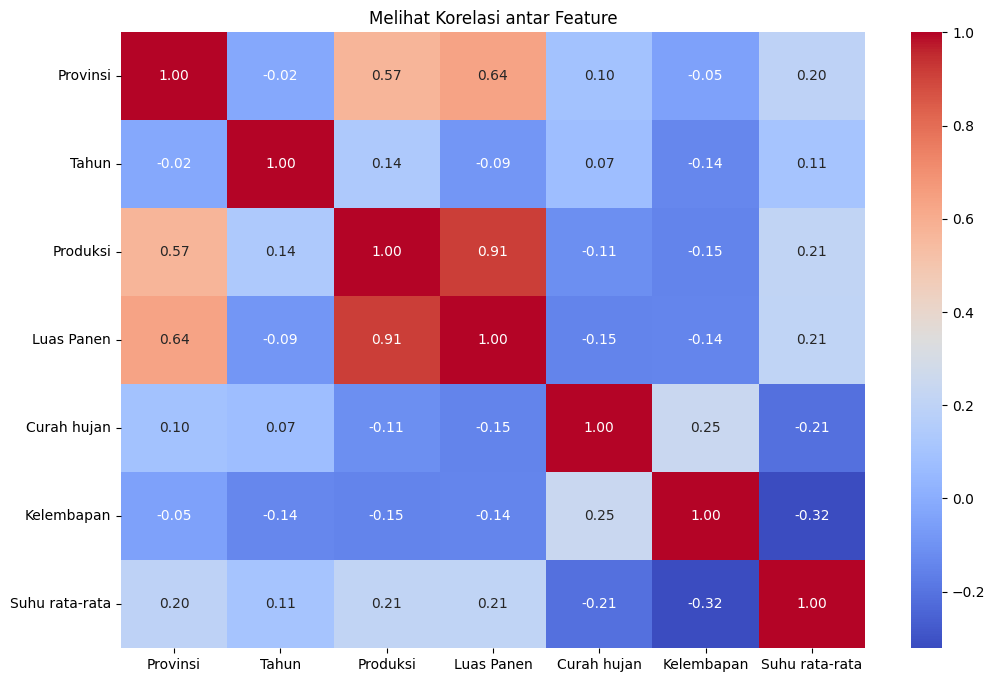

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Melihat Korelasi antar Feature")
plt.show()

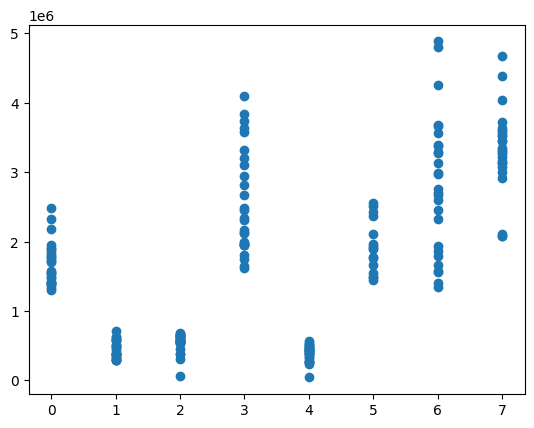

In [ ]:
ypoints = df['Produksi']
xpoints = df['Provinsi']

plt.scatter(xpoints, ypoints)
plt.show()

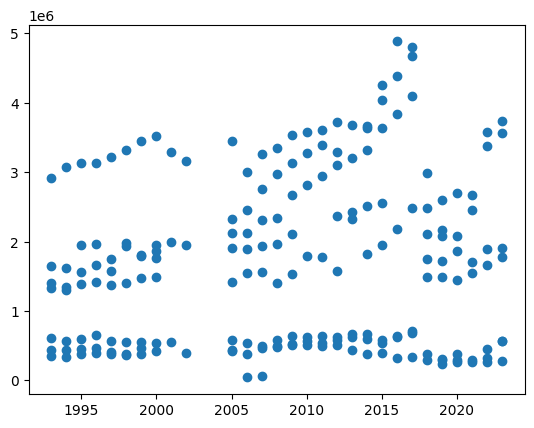

In [ ]:
ypoints = df['Produksi']
xpoints = df['Tahun']

plt.scatter(xpoints, ypoints)
plt.show()

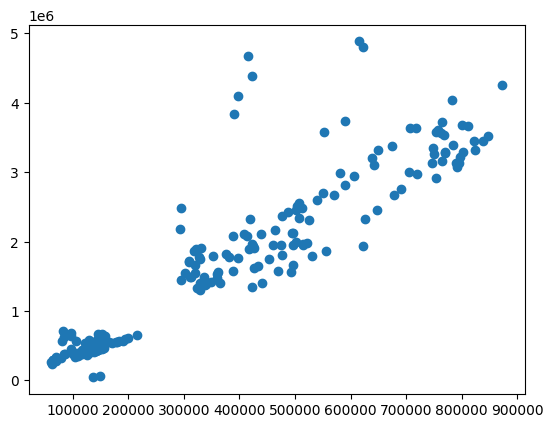

In [ ]:
ypoints = df['Produksi']
xpoints = df['Luas Panen']

plt.scatter(xpoints, ypoints)
plt.show()

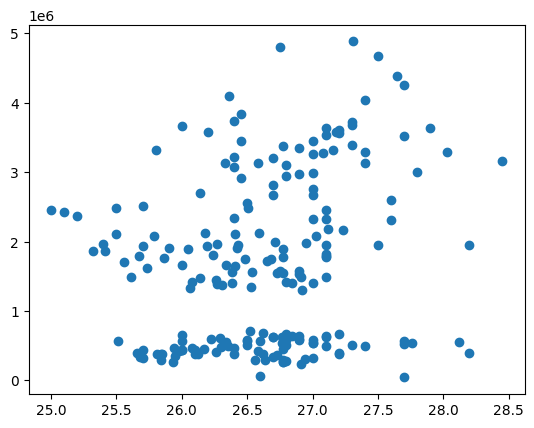

In [ ]:
ypoints = df['Produksi']
xpoints = df['Suhu rata-rata']

plt.scatter(xpoints, ypoints)
plt.show()

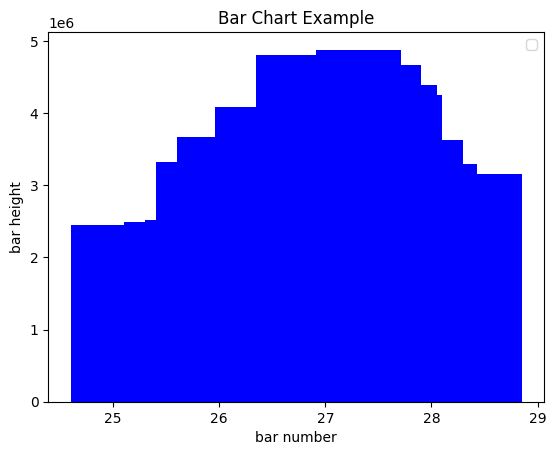

In [ ]:
x=df['Suhu rata-rata']
y=df['Produksi']
plt.bar(x, y, color='b')
plt.plot()

plt.xlabel("bar number")
plt.ylabel("bar height")
plt.title("Bar Chart Example")
plt.legend()
plt.show()

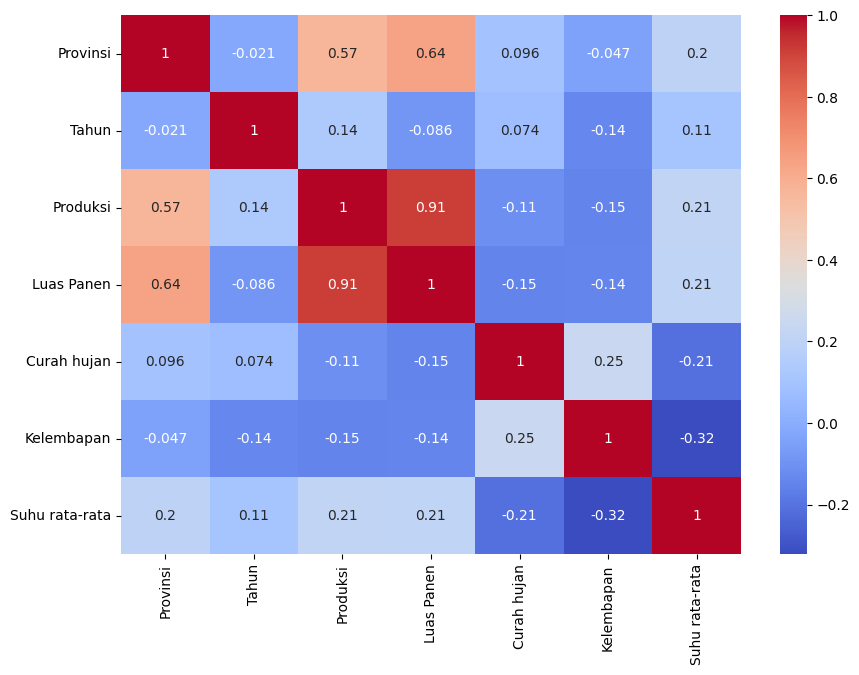

In [ ]:
cor = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(cor, cmap='coolwarm',annot=True)
plt.show()

#Splitting

In [ ]:
#Korelasi dengan variabel keluaran
cor_target = (cor['Produksi'])
#Memilih fitur yang sangat berkorelasi
relevant_features = cor_target[cor_target>0.1]
relevant_features

Provinsi          0.568482
Tahun             0.136307
Produksi          1.000000
Luas Panen        0.913062
Suhu rata-rata    0.213051
Name: Produksi, dtype: float64

In [ ]:
# Menyaring DataFrame berdasarkan fitur-fitur yang sangat berkorelasi
df_fix = df[relevant_features.index]

# Menampilkan lima baris pertama dari DataFrame baru sebagai tabel
print(df_fix.head(5).to_markdown(index=False))

|   Provinsi |   Tahun |    Produksi |   Luas Panen |   Suhu rata-rata |
|-----------:|--------:|------------:|-------------:|-----------------:|
|          0 |    1993 | 1.32954e+06 |       323589 |            26.06 |
|          0 |    1994 | 1.2997e+06  |       329041 |            26.92 |
|          0 |    1995 | 1.3829e+06  |       339253 |            26.27 |
|          0 |    1996 | 1.41913e+06 |       348223 |            26.08 |
|          0 |    1997 | 1.36807e+06 |       337561 |            26.31 |


In [ ]:
from sklearn.model_selection import train_test_split
x = df_fix.drop(['Produksi'], axis=1) #fitur
y = df_fix['Produksi'] #target

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=123)

In [ ]:
print('Total sampel dari semua dataset : ', (len(x)))
print('Total sampel dari dataset latih : ', (len(x_train)))
print('Total sampel dari dataset uji : ', (len(x_test)))

Total sampel dari semua dataset :  203
Total sampel dari dataset latih :  142
Total sampel dari dataset uji :  61


#Modeling

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(x_train, y_train) #fit untuk koef regresi dg minimal kesalahan kuadrat

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [ ]:
# Coefficient dan Intercept
print ('Coefficients: ', model.coef_)
print ('Intercept: ', model.intercept_)

Coefficients:  [-8.09750211e+03  2.84593209e+04  4.67095958e+00 -7.23986598e+03]
Intercept:  -56986639.182685584


In [ ]:
#The predicted data
y_prediksi = model.predict(x_test)

In [ ]:
#Lakukan evaluasi performa
#tampilkan hasil dari data aktual dan data prediksi
df = pd.DataFrame({'aktual': y_test, 'Prediksi': y_prediksi})
print(df.head(10))

         aktual      Prediksi
66   1759059.00  1.558285e+06
133   579635.00  5.877989e+05
214  1646900.00  1.540180e+06
186   396977.00  1.938183e+05
23   2180754.00  1.559911e+06
198   484900.00  5.567465e+05
167  2971286.00  3.273811e+06
119   269836.65  6.262203e+05
71   1907390.00  1.840565e+06
200   516869.00  6.386455e+05


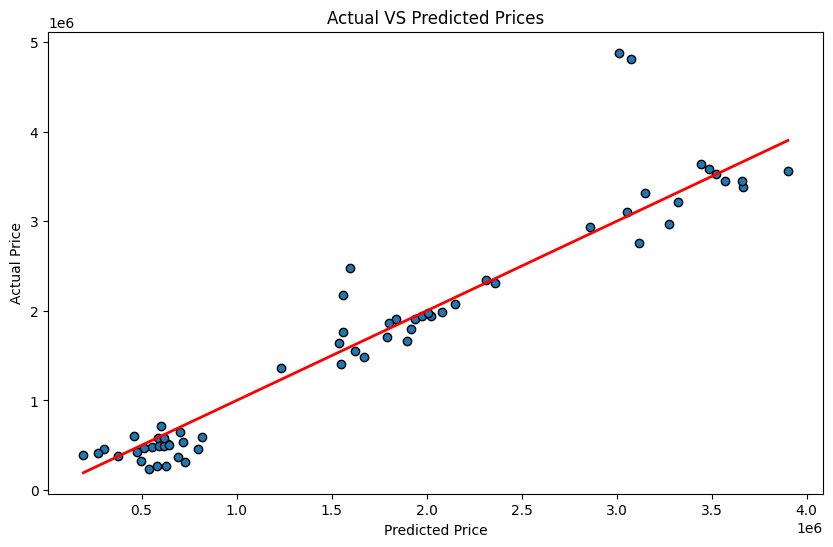

In [ ]:
# Display
plt.figure(figsize=(10, 6))
plt.scatter(y_prediksi, y_test, edgecolor='k')
plt.plot([y_prediksi.min(), y_prediksi.max()], [y_prediksi.min(), y_prediksi.max()], c='r', lw=2)
plt.title("Actual VS Predicted Prices")
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.show()

#Evaluasi

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
print('Testing Score:',r2_score(y_test,y_prediksi))
#print('Training Score:',rf.score(X_train,y_train))

Testing Score: 0.9004959107773702


In [ ]:
#melakukan evaluasi/ pengukuran performa algoritma
#menghitung nilai MAE, MSE dan RMSE

print('Mean Absolute Error:', mean_absolute_error(y_test, y_prediksi))
print('Mean Squared Error:', mean_squared_error(y_test, y_prediksi))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_prediksi)))
print('Mean Absolute Percentage Error: {:.2f}%'.format(mean_absolute_percentage_error(y_test, y_prediksi) * 100))

Mean Absolute Error: 219733.26187501432
Mean Squared Error: 155179459601.89053
Root Mean Squared Error: 393928.241691162
Mean Absolute Percentage Error: 23.37%


#Convert to CSV

In [48]:
df

,aktual,Prediksi
66,1759059.0,1.558285e+06
133,579635.0,5.877989e+05
214,1646900.0,1.540180e+06
186,396977.0,1.938183e+05
23,2180754.0,1.559911e+06
...,...,...
235,3320064.0,3.149548e+06
182,3562837.0,3.902034e+06
14,1556858.0,1.625125e+06
217,1971740.0,2.010123e+06


In [ ]:
df.to_csv('Aktual_Prediksi_Tanaman_Padi_Sumatera.csv')